Please **submit this Jupyter notebook through Canvas** no later than **Monday November 5 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Tharangni H Sivaji (11611065)

-----
# Exercise 1
Consider the function $f(x) = \tan(x)$. Because $\tan(x) = \sin(x) / \cos(x)$, we can approximate $f(x)$ using Taylor approximations for $\sin(x)$ and $\cos(x)$:
$$
  \sin(x) \approx x - \frac{1}{6} x^3, \quad \text{and} \quad \cos(x) \approx 1 - \frac{1}{2} x^2.
$$
This gives the approximation
$$
\hat f(x) = \frac{x - \frac{1}{6} x^3}{1 - \frac{1}{2} x^2}.
$$

## (a)
Evaluate $f(x)$ and $\hat f(x)$ at $x = 1$ and $x = 1.4$. Compute the absolute forward error and absolute backward error.

In [1]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.misc import derivative

In [2]:
def y(x):
    return round(np.tan(x), 5)

def y_hat(x):
    return round((x - (x**3)/6)/(1 - (x**2)/2), 5)

def x_real(x):
    return x

def x_hat(y_error):
    return round(np.arctan(y_error), 5)

def abs_fe(y, y_hat):
    return round(abs(y - y_hat), 5)

def abs_be(x, x_hat):
    return round(abs(x - x_hat), 5)

In [3]:
print("For x = {}, ".format(1))
print("y = {}, y_hat = {}, x_hat = {} ".format( y(1), y_hat(1), x_hat(y_hat(1)) ))
print("Absolute forward error: {}".format( abs_fe(y(1), y_hat(1)) ))
print("Absolute backward error: {}".format( abs_be(x_real(1), x_hat(y_hat(1))) ))
print("---")
print("For x = {}, ".format(1.4))
print("y = {}, y_hat = {}, x_hat = {} ".format( y(1.4), y_hat(1.4), x_hat(y_hat(1.4)) ))
print("Absolute forward error: {}".format( abs_fe(y(1.4), y_hat(1.4)) ))
print("Absolute backward error: {}".format( abs_be(x_real(1.4), x_hat(y_hat(1.4))) ))

For x = 1, 
y = 1.55741, y_hat = 1.66667, x_hat = 1.03038 
Absolute forward error: 0.10926
Absolute backward error: 0.03038
---
For x = 1.4, 
y = 5.79788, y_hat = 47.13333, x_hat = 1.54958 
Absolute forward error: 41.33545
Absolute backward error: 0.14958


Given,

$$
y = f(x) = \tan(x)
$$

$$
\hat y = \hat f(x) = \frac{x - \frac{1}{6} x^3}{1 - \frac{1}{2} x^2}
$$

---

At x = 1 (computing in radians),

$$
y = f(1) = \tan(1) \approx 1.5574
$$

$$
\hat y = \hat f(1) = \frac{1 - \frac{1}{6} 1^3}{1 - \frac{1}{2} 1^2} = \frac{5}{3} \approx 1.6667
$$

$\therefore$ Absolute forward error = $|\hat y - y| = 0.1093$

$$
x = 1 
$$
To compute $\hat x$, 
$$
y = f(x) = \tan(x) \quad \Rightarrow \quad \hat y = f(\hat x) = \tan(\hat x) \\
\Rightarrow \hat x = \tan^{-1}(\hat y) \\
\Rightarrow \hat x = \tan^{-1}(1.6667) \\
\therefore \hat x \approx 1.03047
$$

$\therefore$ Absolute backward error = $|\hat x - x| = 0.0303$

---

At x = 1.4 (computing in radians),

$$
y = f(1) = \tan(1.4) \approx 5.79788
$$

$$
\hat y = \hat f(1.4) = \frac{1 - \frac{1}{6} 1.4^3}{1 - \frac{1}{2} 1.4^2} = \frac{707}{15} \approx 47.13334
$$

$\therefore$ Absolute forward error = $|\hat y - y| = 41.33546$

$$
x = 1.4 
$$
To compute $\hat x$, 
$$
y = f(x) = \tan(x) \quad \Rightarrow \quad \hat y = f(\hat x) = \tan(\hat x) \\
\Rightarrow \hat x = \tan^{-1}(\hat y) \\
\Rightarrow \hat x = \tan^{-1}(47.13334) \\
\therefore \hat x \approx 1.54958
$$

$\therefore$ Absolute backward error = $|\hat x - x| = 0.14958$

## (b)
Ignore $\hat f(x)$ for now. Compute the relative condition number of $f(x)$ near $x=1$ and near $x=1.4$.

In [4]:
def rfe(y, y_hat):
    return round(abs( abs_fe(y, y_hat)/y ), 5)

def rbe(x, x_hat):
    return round(abs( abs_be(x, x_hat)/x ), 5)

def rcn(r_fe, r_be):
    return round(abs(r_fe/r_be), 5)

In [5]:
# x = 1
x_ = x_real(1)
y_real = y(x_)
y_error = y_hat(x_)
x_error = x_hat(y_error)

# ignoring f_hat(x) by setting it to 0
rfe_ign_x1 = rfe(y_real, 0)
rbe_ign_x1 = rbe(x_, x_error)
rcn_ign_x1 = rcn(rfe_ign_x1, rbe_ign_x1)

print("For x = {}, ".format(1))
print("Relative forward error: {}".format(rfe_ign_x1))
print("Relative backward error: {}".format(rbe_ign_x1))
print("Relative condition number: {}".format(rcn_ign_x1))

For x = 1, 
Relative forward error: 1.0
Relative backward error: 0.03038
Relative condition number: 32.91639


In [6]:
# x = 1.4
x_ = x_real(1.4)
y_real = y(x_)
y_error = y_hat(x_)
x_error = x_hat(y_error)

# ignoring f_hat(x) by setting it to 0
rfe_ign_x14 = rfe(y_real, 0)
rbe_ign_x14 = rbe(x_, x_error)
rcn_ign_x14 = rcn(rfe_ign_x14, rbe_ign_x14)

print("For x = {}, ".format(1.4))
print("Relative forward error: {}".format(rfe_ign_x14))
print("Relative backward error: {}".format(rbe_ign_x14))
print("Relative condition number: {}".format(rcn_ign_x14))

For x = 1.4, 
Relative forward error: 1.0
Relative backward error: 0.10684
Relative condition number: 9.35979


Igoring $\hat f(x)$ by setting $\hat y = 0$,

Relative forward error (RFE) = $|\frac{\hat y - y}{y}|$ = 1 (for both x near 1 and 1.4)

Relative backward error (RBE) = $|\frac{\hat x - x}{x}|$ 

Relative condition number = $\frac{(RFE)}{(RBE)}$ = $ \frac{1}{RBE} $ = $\left |\frac{x}{\hat x - x}\right |$

---
At x = 1,

Relative condition number = $\left |\frac{x}{\hat x - x}\right |$ 

= $\left | \frac{1}{1 - 1.03047} \right |$ 

$\approx$ 32.8947

---

At x = 1.4,

Relative condition number = $\left |\frac{x}{\hat x - x}\right |$ 

= $\left |\frac{1.4}{1.54958 - 1.4}\right |$

= $\frac{1.4}{0.14958}$

$\approx$ 9.3645

## (c)
Compute the relative condition number of $\hat f(x)$ near $x=1$ and near $x=1.4$.

In [7]:
# x = 1
x_ = x_real(1)
y_real = y(x_)
y_error = y_hat(x_)
x_error = x_hat(y_error)

rfe_x1 = rfe(y_real, y_error)
rbe_x1 = rbe(x_, x_error)
rcn_x1 = rcn(rfe_x1, rbe_x1)

print("For x = {}, ".format(1))
print("Relative forward error: {}".format(rfe_x1))
print("Relative backward error: {}".format(rbe_x1))
print("Relative condition number: {}".format(rcn_x1))

For x = 1, 
Relative forward error: 0.07015
Relative backward error: 0.03038
Relative condition number: 2.30908


In [8]:
# x = 1.4
x_ = x_real(1.4)
y_real = y(x_)
y_error = y_hat(x_)
x_error = x_hat(y_error)

rfe_x14 = rfe(y_real, y_error)
rbe_x14 = rbe(x_, x_error)
rcn_x14 = rcn(rfe_x14, rbe_x14)

print("For x = {}, ".format(1.4))
print("Relative forward error: {}".format(rfe_x14))
print("Relative backward error: {}".format(rbe_x14))
print("Relative condition number: {}".format(rcn_x14))

For x = 1.4, 
Relative forward error: 7.12941
Relative backward error: 0.10684
Relative condition number: 66.72978


At x = 1,

Relative forward error = $\left |\frac{\hat y - y}{y}\right |$ = $\left |\frac{1.6667 - 1.5574}{1.5574}\right |$ = 0.07018

Relative backward error = $\left |\frac{\hat x - x}{x}\right |$ = $\left |\frac{1.03047 - 1}{1}\right |$ = 0.0303

Relative condition number = $\frac{0.07018}{0.0303}$ $\approx$ 2.31617

---

At x = 1.4,

Relative forward error = $\left |\frac{\hat y - y}{y}\right |$ = $\left |\frac{47.13334 - 5.79788}{5.79788}\right |$ = 7.1294

Relative backward error = $\left |\frac{\hat x - x}{x}\right |$ = $\frac{0.14958}{1.4}$ = 0.10678

Relative condition number = $\frac{7.1294}{0.10678}$ $\approx$ 66.7671

--------
# Exercise 2
Consider the following finite difference approximations of the second derivative of a function $f(x)$:
$$
\text{Centered FD:} \quad f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2},
$$
$$
\text{Forward FD:} \quad f''(x) \approx \frac{f(x+2h) - 2f(x+h) + f(x)}{h^2}.
$$

## (a)
Consider the function $f(x) = \exp(-2x)$ evaluated at $x = 0.5$. Compute both finite difference approximations for the range $h \in \{1, 10^{-1}, \ldots, 10^{-16}\}$.

In [9]:
def f(x, method):
    if method == "first":
        return np.sin(x)
    return np.exp(-2*x)

def f_xx(x, method):
    if method == "first":
        return np.cos(x)
    return 4*np.exp(-2*x)

def centered_fd(x, h, method):
    if method == "first":
        nr = f(x+h, method) - f(x-h, method)
        dr = 2*h
    else:    
        nr = f(x+h, method) + f(x-h, method) - 2*f(x, method)
        dr = h**2
    return abs(nr/dr)

def forward_fd(x, h, method):
    if method == "first":
        nr = f(x+h, method) - f(x, method)
        dr = h
    else:
        nr = f(x+2*h, method) - 2*f(x+h, method) + f(x, method)
        dr = h**2
    return abs(nr/dr)

In [10]:
a = 1
r = 10
length = 17

val1 = 1
val2 = 0.5

h = [a * r ** (1-n) for n in range(1, length+1)]

In [11]:
true_fx = f_xx(val1, method = "first")
true_fxx = f_xx(val2, method="second")

In [12]:
'''
L[:, 0] : Value of x
L[:, 1] : Value of h, step size
L[:, 2] : Centered finite difference approximation for second derivative
L[:, 3] : Forward finite difference approximation for second derivative
L[:, 4] : Total error in C-FD
L[:, 5] : Total error in F-FD
'''

L1 = np.zeros((length, 6)) # f(x) = sin(x) 
L2 = np.zeros((length, 6)) # f(x) = exp(-2x)

for i, step in enumerate(h):
    L1[i][0] = val1
    L1[i][1] = step
    L1[i][2] = centered_fd(val1, step, method="first") 
    L1[i][3] = forward_fd(val1, step, method="first") 
    L1[i][4] = abs(true_fx - L1[i][2])
    L1[i][5] = abs(true_fx - L1[i][3])
    
    L2[i][0] = val2
    L2[i][1] = step
    L2[i][2] = centered_fd(val2, step, method="second") 
    L2[i][3] = forward_fd(val2, step, method="second") 
    L2[i][4] = abs(true_fxx - L2[i][2])
    L2[i][5] = abs(true_fxx - L2[i][3])

In [13]:
print(L2[:,2:4]) # Centerd FD and Forward FD respectively for exp(-2x)

[[2.03231001e+00 2.75043251e-01]
 [1.47642937e+00 1.20879813e+00]
 [1.47156682e+00 1.44242784e+00]
 [1.47151826e+00 1.46857816e+00]
 [1.47151777e+00 1.47122349e+00]
 [1.47151846e+00 1.47148738e+00]
 [1.47148960e+00 1.47165613e+00]
 [1.47659662e+00 1.45994328e+00]
 [0.00000000e+00 2.77555756e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.55111512e+03]
 [0.00000000e+00 5.55111512e+05]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.11022302e+10]
 [0.00000000e+00 5.55111512e+11]
 [0.00000000e+00 5.55111512e+13]
 [0.00000000e+00 5.55111512e+15]]


## (b)
Using the true second derivative $f''(x)$ at $x=0.5$, plot the total error of the two approximations as a function of $h$, like Figure 1.1 of the book by Heath.

In [14]:
# modify the bounds
M = 1
eps = 1e-16
A1 = np.zeros((length, 7))
A2 = np.zeros((length, 7))

In [15]:
'''
A[:, 0] : Value of x
A[:, 1] : Value of h, step size
A[:, 2] : Centered finite difference approximation for second derivative
A[:, 3] : Forward finite difference approximation for second derivative
A[:, 4] : Truncation Error F-FD
A[:, 5] : Rounding Error F-FD
A[:, 6] : Computational Error
'''
for i, step in enumerate(h):
    A1[i][0] = val1
    A1[i][1] = step
    A1[i][2] = centered_fd(val1, step, method="second") 
    A1[i][3] = forward_fd(val1, step, method="second") 
    A1[i][4] = abs(true_fx - int(A1[i][3] * 10000)/10000.0 + M*step/2)
    A1[i][5] = abs(A1[i][2] - round(A1[i][3], 4) + 2*eps/step)
    A1[i][6] = abs(A1[i][4]+A1[i][5])
    
    A2[i][0] = val2
    A2[i][1] = step
    A2[i][2] = centered_fd(val2, step, method="second") 
    A2[i][3] = forward_fd(val2, step, method="second") 
    A2[i][4] = abs(true_fxx - int(A2[i][3] * 10000)/10000.0 + M*step/2)
    A2[i][5] = abs(A2[i][2] - round(A2[i][3], 4) + 2*eps/step)
    A2[i][6] = abs(A2[i][4]+A2[i][5])

In [16]:
plt.rcParams["figure.figsize"] = (16, 10)

#### For f(x) = sin(x)

The plot on right for forward approximation verifies against the one in Fig 1.1 in the textbook

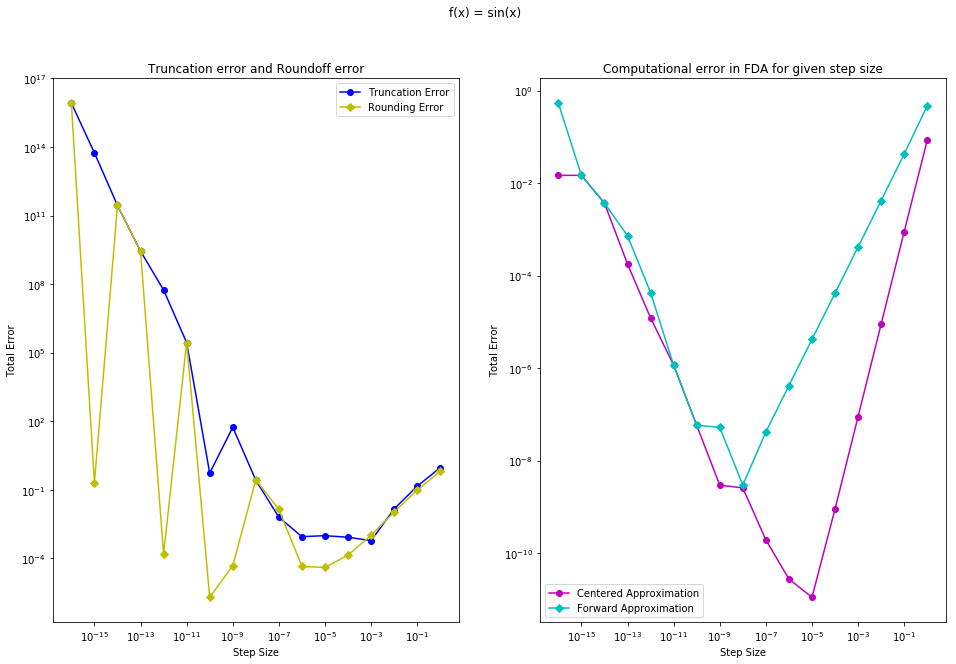

In [17]:
fig_x, ax_x = plt.subplots(1, 2)

ax1 = ax_x[0]
ax1.loglog(A1[:, 1], A1[:, 4], 'bo-', label = "Truncation Error")
ax1.loglog(A1[:, 1], A1[:, 5], 'yD-', label = "Rounding Error")
# ax1.loglog(A[:, 1], A[:, 6], 'r*-', label = "Computational Error")
ax1.set_xlabel("Step Size")
ax1.set_ylabel("Total Error")
ax1.set_title("Truncation error and Roundoff error")
ax1.legend()

ax2 = ax_x[1]
ax2.loglog(L1[:, 1], L1[:, 4], 'mo-', label = "Centered Approximation")
ax2.loglog(L1[:, 1], L1[:, 5], 'cD-', label = "Forward Approximation")
ax2.set_xlabel("Step Size")
ax2.set_ylabel("Total Error")
ax2.set_title("Computational error in FDA for given step size")
ax2.legend()

fig_x.suptitle("f(x) = sin(x)")
plt.show()

#### For f(x) = exp(-2x)

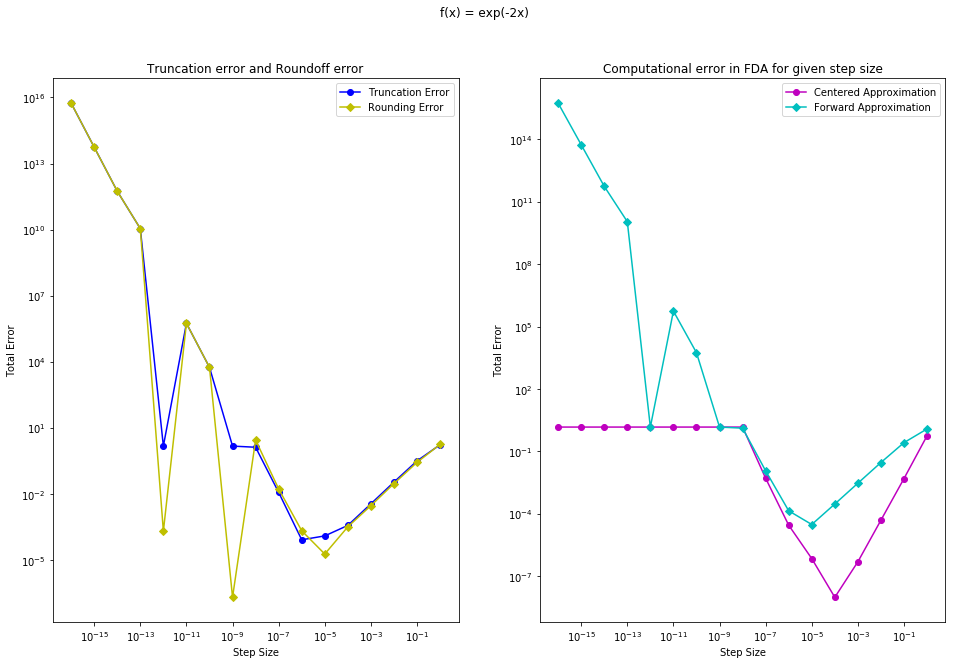

In [18]:
fig_xx, ax_xx = plt.subplots(1, 2)

ax1 = ax_xx[0]
ax1.loglog(A2[:, 1], A2[:, 4], 'bo-', label = "Truncation Error")
ax1.loglog(A2[:, 1], A2[:, 5], 'yD-', label = "Rounding Error")
# ax1.loglog(A[:, 1], A[:, 6], 'r*-', label = "Computational Error")
ax1.set_xlabel("Step Size")
ax1.set_ylabel("Total Error")
ax1.set_title("Truncation error and Roundoff error")
ax1.legend()

ax2 = ax_xx[1]
ax2.loglog(L2[:, 1], L2[:, 4], 'mo-', label = "Centered Approximation")
ax2.loglog(L2[:, 1], L2[:, 5], 'cD-', label = "Forward Approximation")
ax2.set_xlabel("Step Size")
ax2.set_ylabel("Total Error")
ax2.set_title("Computational error in FDA for given step size")
ax2.legend()

fig_xx.suptitle("f(x) = exp(-2x)")
plt.show()

## (c)
Explain, in words, what you see. How do these approximations compare?

For f(x) = exp(-2x) we see that forward approximation optimizes at 1e-5, whereas centered approximation optimizes at 1e-4. For the same function, the rounding error increases for smaller step sizes while the truncating error varies the same way as forward approximation. 

----
# Exercise 3 (Computer exercise 1.13 from the book)
If an amount $a$ is invested at interest rate $r$ compounded $n$ times per year, then the final value $f$ at the end of one year is given by
$$
  f = a (1 + r/n)^n.
$$
This is the familiar formula for _compound interest_. When simple interest, $n=1$. Typically, compounding is done quarterly ($n=4$) or daily ($n=365$). Obviously, the more frequent the compounding, the greater the final amount. But how much difference does this frequency actually make?

## (a)
Write a program that implements the compound interest formula. Test your program using an initial investment of $a=100$, interest rate of 5 percent (so $r=0.05$), and the following values for $n$: $1, 4, 12, 365$.
Do not use Pythons `pow` function, but compute $f$ as $a (1 + r/n) \cdot (1+r/n) \cdot \ldots \cdot (1+r/n)$.

In [19]:
def compound_interest(a, r, n):
    term = (1.0 + float(r/n))**n
    return (a * term)

In [20]:
print("Compound interest with a: {}, n: {}, r: {} is: {}".format(100, 1, 0.05, compound_interest(100, 0.05, 1)) )
print("Compound interest with a: {}, n: {}, r: {} is: {}".format(100, 4, 0.05, compound_interest(100, 0.05, 4)) )
print("Compound interest with a: {}, n: {}, r: {} is: {}".format(100, 12, 0.05, compound_interest(100, 0.05, 12)) )
print("Compound interest with a: {}, n: {}, r: {} is: {}".format(100, 365, 0.05, compound_interest(100, 0.05, 365)) )

Compound interest with a: 100, n: 1, r: 0.05 is: 105.0
Compound interest with a: 100, n: 4, r: 0.05 is: 105.09453369140623
Compound interest with a: 100, n: 12, r: 0.05 is: 105.1161897881733
Compound interest with a: 100, n: 365, r: 0.05 is: 105.12674964674473


## (b)
We can rewrite $f$ as $f = a \exp(n \log(1 + r/n))$. Using this formula, do the same as in (a).

In [21]:
def exp_ci(a, r, n):
    return (a * np.exp(n * np.log(1.0 + r/n)))

In [22]:
print("Compound interest with a: {}, n: {}, r: {} is: {}".format(100, 0.05, 1, exp_ci(100, 0.05, 1 )) )
print("Compound interest with a: {}, n: {}, r: {} is: {}".format(100, 0.05, 4, exp_ci(100, 0.05, 4)) )
print("Compound interest with a: {}, n: {}, r: {} is: {}".format(100, 0.05, 12, exp_ci(100, 0.05, 12)) )
print("Compound interest with a: {}, n: {}, r: {} is: {}".format(100, 0.05, 365, exp_ci(100, 0.05, 365)) )

Compound interest with a: 100, n: 0.05, r: 1 is: 105.0
Compound interest with a: 100, n: 0.05, r: 4 is: 105.09453369140623
Compound interest with a: 100, n: 0.05, r: 12 is: 105.1161897881733
Compound interest with a: 100, n: 0.05, r: 365 is: 105.12674964674473


## (c)
Can you find a value of $n$ such that the formula of (a) becomes unstable? Explain this phenomenon in words.

In [23]:
print(compound_interest(100, 0.05, 1.9**52))
print(compound_interest(100, 0.05,  2**52))

107.19107892336255
100.0


The value of *n* becomes unstable with any value after $\approx$ 450 trillion (4.50 $\times 10^{14} \approx 2^{52}$).

For values greater than $ 2^{52}$, the formula in (a) always results in 100. (a = 100, *term* = 1)

This is due the limitations of machine approximation of the floating point numbers for an IEEE double precision system. This limitation results in an *overflow* where the number cannot be represented by its exact value but rather its closest approximation. 

In [24]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)